In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [16]:
file_path = "/Users/kilian_1/Desktop/Education/Bayes_MSc_Energy_Trade_and_Finance/Term_3/Market Microstructure/Market-Microstucture-Rep/SMM921_pf_data_2025.xlsx"

xls = pd.ExcelFile(file_path)

# List all sheet names
sheet_names = xls.sheet_names
print(sheet_names)

['Sheet1']


In [17]:
#Sheet No 1
df = xls.parse('Sheet1')
# Display the first few rows of the DataFrame
print(df.head())

        Date       USA        UK  SWITZERLAND     JAPAN    CANADA  AUSTRALIA  \
0 2005-04-15  3507.828  5060.311     6224.893  3938.125  3010.789   2336.187   
1 2005-05-15  3553.162  4956.132     6117.656  3888.713  2977.948   2317.114   
2 2005-06-15  3720.877  5020.741     6190.299  3900.643  3222.164   2476.611   
3 2005-07-15  3795.205  5037.781     6284.623  3915.725  3384.225   2456.576   
4 2005-08-15  3816.509  5317.972     6669.856  4204.958  3623.669   2629.739   

   NEW ZEALAND     SWEDEN    NORWAY  ...  PHILIPPINES   POLAND  PORTUGAL  \
0      318.789  13320.766  5840.196  ...      185.285  842.196   219.282   
1      308.657  13075.742  5653.079  ...      189.071  770.341   212.415   
2      325.690  13069.112  6113.798  ...      196.316  839.677   200.742   
3      328.436  13613.460  6526.605  ...      184.442  870.102   197.986   
4      342.691  14435.050  7066.684  ...      193.147  952.621   211.368   

     KOREA     SPAIN   TAIWAN  THAILAND    BRAZIL   ISRAEL    

        Date       USA        UK  SWITZERLAND     JAPAN    CANADA  AUSTRALIA  \
0 2005-04-15       NaN       NaN          NaN       NaN       NaN        NaN   
1 2005-05-15  0.012924 -0.020587    -0.017227 -0.012547 -0.010908  -0.008164   
2 2005-06-15  0.047202  0.013036     0.011874  0.003068  0.082008   0.068834   
3 2005-07-15  0.019976  0.003394     0.015237  0.003867  0.050296  -0.008090   
4 2005-08-15  0.005613  0.055618     0.061298  0.073864  0.070753   0.070490   

   NEW ZEALAND    SWEDEN    NORWAY  ...  PHILIPPINES    POLAND  PORTUGAL  \
0          NaN       NaN       NaN  ...          NaN       NaN       NaN   
1    -0.031783 -0.018394 -0.032040  ...     0.020433 -0.085319 -0.031316   
2     0.055184 -0.000507  0.081499  ...     0.038319  0.090007 -0.054954   
3     0.008431  0.041651  0.067521  ...    -0.060484  0.036234 -0.013729   
4     0.043403  0.060351  0.082750  ...     0.047196  0.094838  0.067591   

      KOREA     SPAIN    TAIWAN  THAILAND    BRAZIL    ISRAEL 

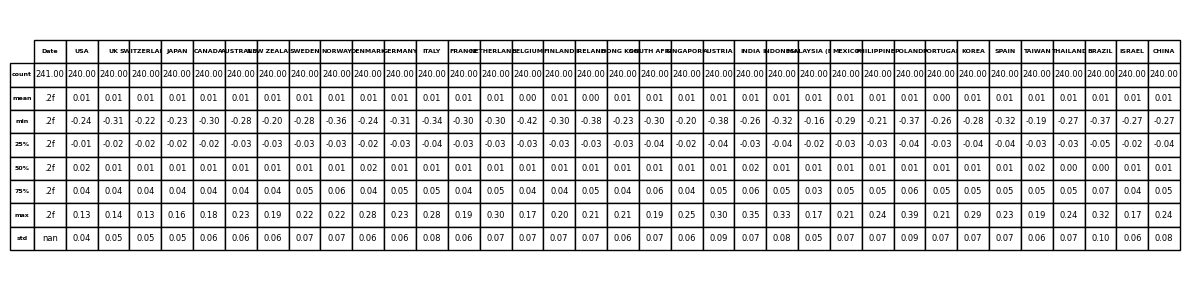

In [31]:
#Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

returns_df = df.iloc[:, 1:].pct_change() # Uses iloc (integer-location based indexing) to select all rows (:) and all columns starting from the second one (1:).

returns_df.insert(0, 'Date', df['Date'])  # Insert the 'Date' column back into the returns DataFrame

#Visualise the dataframe
print(returns_df.head())


desc = returns_df.describe()

# 5. Prepare a text table with 2‐decimal formatting
cell_text = [
    [f"{val:.2f}" for val in desc.loc[row].values]
    for row in desc.index
]

# 6. Plot the table
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

table = ax.table(
    cellText=cell_text,
    rowLabels=desc.index,
    colLabels=desc.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# 7. Adjust overall font size
table.auto_set_font_size(False)
table.set_fontsize(6)
table.scale(1, 1.2)

# 8. Increase header font size and weight
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(fontsize=4.5, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
returns_df["world stock market return"] = returns_df.iloc[:, 1:].mean(axis = 1) #axis = 1 means we are calculating the mean across columns for each row
print(returns_df.head())

        Date       USA        UK  SWITZERLAND     JAPAN    CANADA  AUSTRALIA  \
0 2005-04-15       NaN       NaN          NaN       NaN       NaN        NaN   
1 2005-05-15  0.012924 -0.020587    -0.017227 -0.012547 -0.010908  -0.008164   
2 2005-06-15  0.047202  0.013036     0.011874  0.003068  0.082008   0.068834   
3 2005-07-15  0.019976  0.003394     0.015237  0.003867  0.050296  -0.008090   
4 2005-08-15  0.005613  0.055618     0.061298  0.073864  0.070753   0.070490   

   NEW ZEALAND    SWEDEN    NORWAY  ...    POLAND  PORTUGAL     KOREA  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1    -0.031783 -0.018394 -0.032040  ... -0.085319 -0.031316 -0.012608   
2     0.055184 -0.000507  0.081499  ...  0.090007 -0.054954  0.067882   
3     0.008431  0.041651  0.067521  ...  0.036234 -0.013729  0.027065   
4     0.043403  0.060351  0.082750  ...  0.094838  0.067591  0.104349   

      SPAIN    TAIWAN  THAILAND    BRAZIL    ISRAEL     CHINA  \
0       NaN    

In [ ]:
returns_clean = returns_df.dropna()  # Drop rows with NaN values
# Q1: Full-sample annualised return statistics per country


# Reshape the data: long format (Date, Country, Monthly Return)
returns_formatted = returns_clean.melt(id_vars=["Date"], var_name="Country", value_name="Monthly Return")

# Group by Country and compute full-period annualised stats
annual_stats = returns_formatted.groupby("Country").agg(
    annualised_returns=("Monthly Return", lambda x: x.mean() * 12),
    annualised_std=("Monthly Return", lambda x: x.std() * np.sqrt(12)),
    annualised_sharpe=("Monthly Return", lambda x: (x.mean() / x.std()) * np.sqrt(12))
).reset_index()

# Print results
print(annual_stats.head(15))


      Country  annualised_returns  annualised_std  annualised_sharpe
0   AUSTRALIA            0.090918        0.213227           0.426391
1     AUSTRIA            0.068224        0.296654           0.229977
2     BELGIUM            0.052974        0.230424           0.229900
3      BRAZIL            0.115408        0.336686           0.342776
4      CANADA            0.092127        0.194547           0.473544
5       CHINA            0.129086        0.292370           0.441517
6     DENMARK            0.123472        0.212712           0.580464
7     FINLAND            0.073594        0.226490           0.324931
8      FRANCE            0.083145        0.213208           0.389973
9     GERMANY            0.093532        0.219949           0.425245
10  HONG KONG            0.071557        0.197803           0.361757
11      INDIA            0.131559        0.255372           0.515165
12  INDONESIA            0.109350        0.269999           0.405000
13    IRELAND            0.043815 

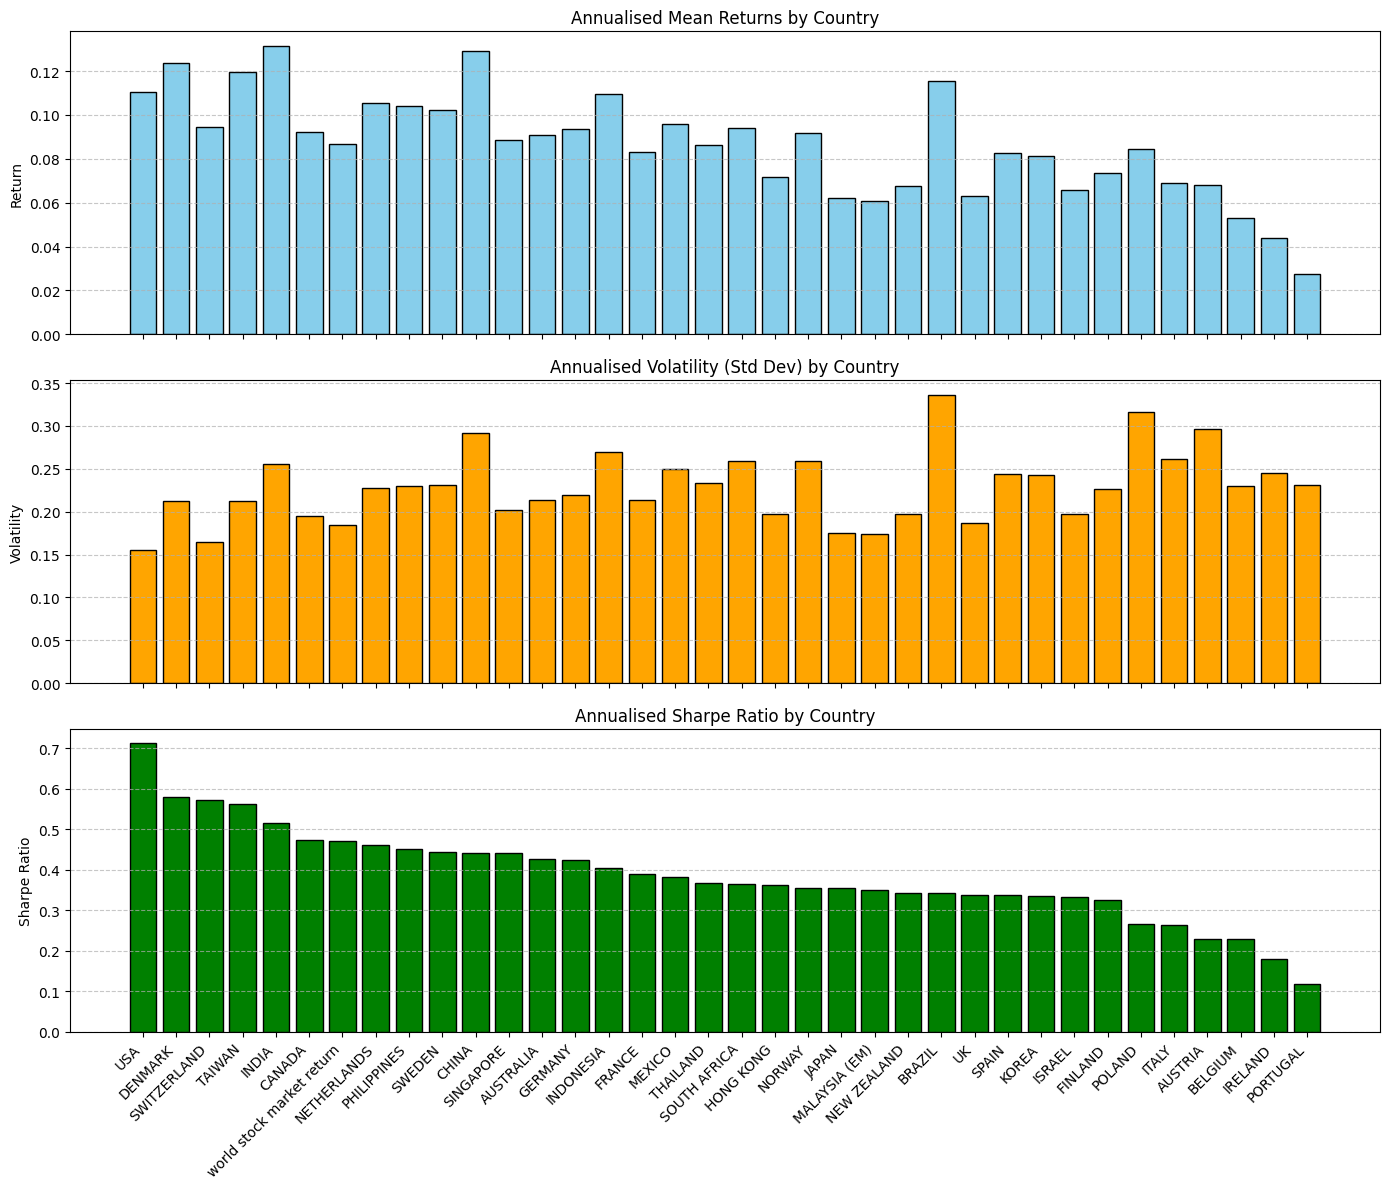

In [ ]:
# Sort the summary by Sharpe ratio for clearer visualization
annual_stats_sorted = annual_stats.sort_values("annualised_sharpe", ascending=False)

# Plot all 3 metrics in one figure
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Bar chart: Annualised Mean Returns
axs[0].bar(annual_stats_sorted["Country"], annual_stats_sorted["annualised_returns"], color="skyblue", edgecolor="black")
axs[0].set_title("Annualised Mean Returns by Country")
axs[0].set_ylabel("Return")
axs[0].grid(axis="y", linestyle="--", alpha=0.7)

# Bar chart: Annualised Standard Deviation
axs[1].bar(annual_stats_sorted["Country"], annual_stats_sorted["annualised_std"], color="orange", edgecolor="black")
axs[1].set_title("Annualised Volatility (Std Dev) by Country")
axs[1].set_ylabel("Volatility")
axs[1].grid(axis="y", linestyle="--", alpha=0.7)

# Bar chart: Sharpe Ratio
axs[2].bar(annual_stats_sorted["Country"], annual_stats_sorted["annualised_sharpe"], color="green", edgecolor="black")
axs[2].set_title("Annualised Sharpe Ratio by Country")
axs[2].set_ylabel("Sharpe Ratio")
axs[2].grid(axis="y", linestyle="--", alpha=0.7)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/kz/wd_zsn3x44q4p42skj6w42jh0000gp/T/ipykernel_51271/69901390.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[country] = model.params[1]  # The beta is the second parameter (index 1)


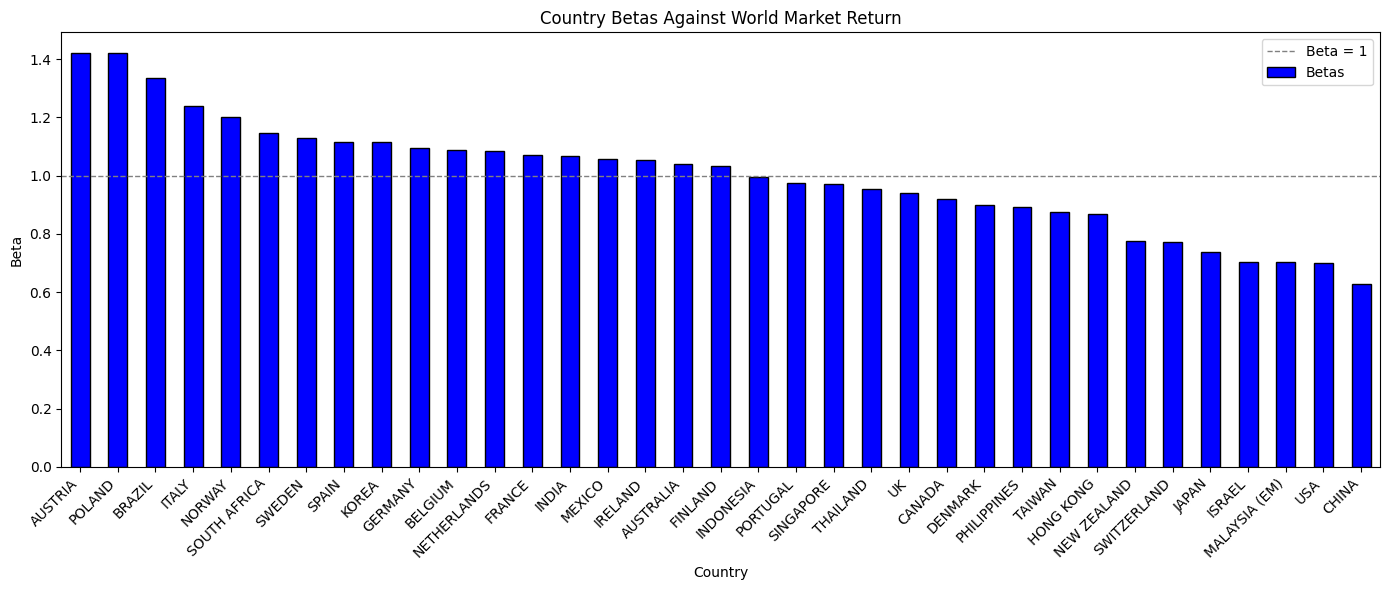

In [ ]:
#Q2
'''Create, for each of the countries, the beta against the world return series. Plot them,
interpret your findings (in terms of risk exposures for countries) and identify any
outliers. [Note: there is no need to account for the risk-free rate when computing the
betas.]'''

regression_data = returns_df.dropna()


#Compute explanatory variable + add constant (Beta_0)
X = sm.add_constant(regression_data["world stock market return"])

#dictionnary to stoe the betas
betas = {}

for country in regression_data.columns:
    if country != "Date" and country != "world stock market return":
        # Dependent variable (returns of the country)
        y = regression_data[country]
        
        # Fit the OLS regression model
        model = sm.OLS(y, X).fit()
        
        # Store the beta coefficient (slope) in the dictionary
        betas[country] = model.params[1]  # The beta is the second parameter (index 1)

# Convert to df
betas_df =  pd.DataFrame.from_dict(betas, orient= "index", columns= ["Betas"])
betas_df = betas_df.sort_values("Betas", ascending= False)

plt.figure(figsize=(14, 6))
betas_df["Betas"].plot(kind='bar', color='blue', edgecolor='black')
plt.title("Country Betas Against World Market Return")
plt.ylabel("Beta")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.axhline(1.0, color='gray', linestyle='--', linewidth=1, label='Beta = 1')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
#Q3
momentum_signals = pd.DataFrame(index=returns_df.index)
#For each country and month: Momentum signal = sum of returns over months t–12 to t–2 ( Exclude the most recent month (t–1))
for country in returns_df.columns:
    if country not in ["Date", "world stock market return"]:   
        momentum_signals[country] = returns_df[country].shift(2).rolling(window=11).sum()

print(momentum_signals.head(15))

         USA        UK  SWITZERLAND     JAPAN    CANADA  AUSTRALIA  \
0        NaN       NaN          NaN       NaN       NaN        NaN   
1        NaN       NaN          NaN       NaN       NaN        NaN   
2        NaN       NaN          NaN       NaN       NaN        NaN   
3        NaN       NaN          NaN       NaN       NaN        NaN   
4        NaN       NaN          NaN       NaN       NaN        NaN   
5        NaN       NaN          NaN       NaN       NaN        NaN   
6        NaN       NaN          NaN       NaN       NaN        NaN   
7        NaN       NaN          NaN       NaN       NaN        NaN   
8        NaN       NaN          NaN       NaN       NaN        NaN   
9        NaN       NaN          NaN       NaN       NaN        NaN   
10       NaN       NaN          NaN       NaN       NaN        NaN   
11       NaN       NaN          NaN       NaN       NaN        NaN   
12       NaN       NaN          NaN       NaN       NaN        NaN   
13  0.156443  0.1462

{1: [], 2: [], 3: [], 4: [], 5: []}
            1         2         3         4         5
14  -0.080976 -0.065257 -0.086312 -0.148697 -0.147459
15  -0.011200  0.023857  0.023633  0.035445  0.082840
16   0.049011  0.071545  0.080482  0.059461  0.041461
17   0.031822  0.014520  0.026074  0.017661 -0.006261
18   0.034022  0.034767  0.042876  0.035541  0.052646
..        ...       ...       ...       ...       ...
236 -0.005926 -0.000916  0.018311  0.032139  0.036470
237 -0.028354 -0.017624 -0.039871 -0.027443 -0.015470
238  0.064879  0.051720  0.043842  0.074970  0.053332
239 -0.008595  0.034234  0.003882  0.013660 -0.009382
240 -0.018442 -0.020197 -0.017135 -0.025590 -0.022240

[227 rows x 5 columns]
     Portfolio 1  Portfolio 2  Portfolio 3  Portfolio 4  Portfolio 5
14      0.919024     0.934743     0.913688     0.851303     0.852541
15      0.908730     0.957044     0.935281     0.881477     0.923165
16      0.953268     1.025515     1.010555     0.933891     0.961440
17      0.983603

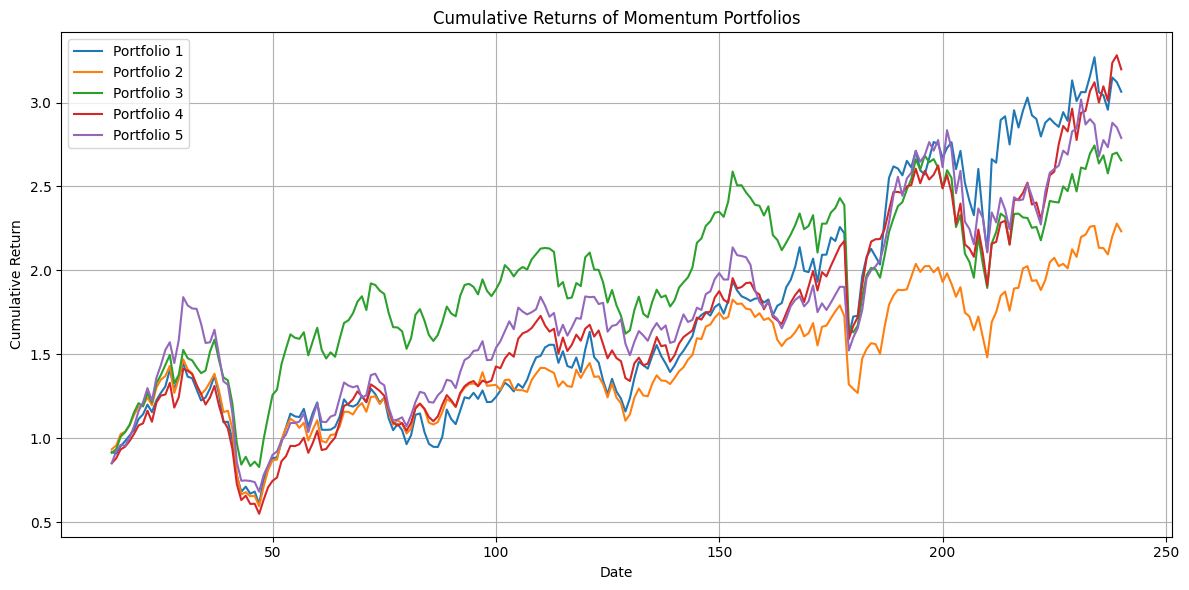

14     0.933517
15     1.021306
16     1.013594
17     0.974994
18     0.993153
         ...   
236    0.713291
237    0.722482
238    0.714139
239    0.713577
240    0.710867
Length: 227, dtype: float64


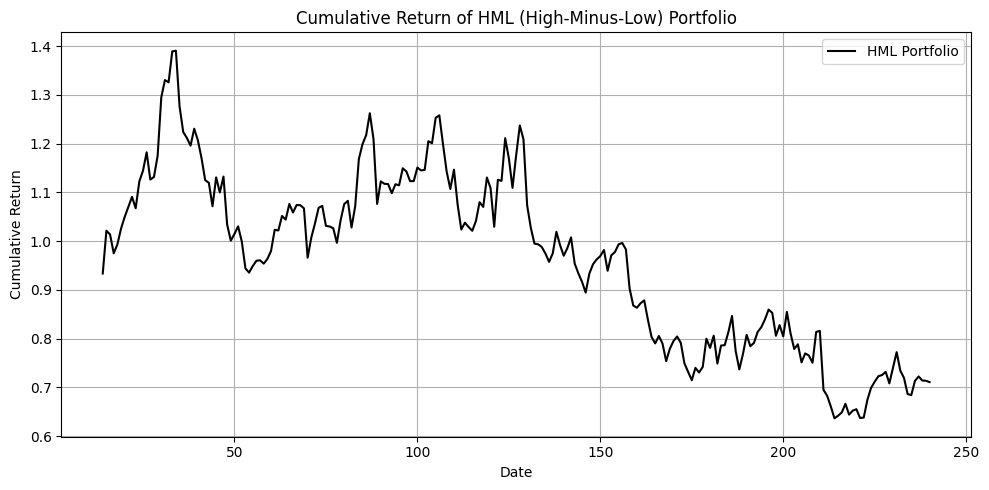

   HML Mean Return  HML Std Dev  HML Sharpe Ratio  HML Alpha  \
0        -0.009004     0.133835         -0.067279   0.000003   

   HML Beta to World  
0          -0.122383  


In [ ]:
def create_portfolio_returns():
    portfolio_returns = {}
    for i in range(1, 6):
        portfolio_returns[i] = []
    return portfolio_returns

# Usage
portfolio_returns = create_portfolio_returns()
print(portfolio_returns)
dates = []


for t in range(len(momentum_signals) - 1):  # up to second last row
    current_date = momentum_signals.index[t]
    next_date = momentum_signals.index[t + 1]

    current_mom = momentum_signals.iloc[t]
    next_returns = returns_df.iloc[t + 1]

    valid_mom = current_mom.dropna()
    valid_mom = valid_mom[valid_mom.index != "Date"]
    valid_mom = valid_mom[valid_mom.index != "world stock market return"]
    

    if len(valid_mom) >= 5: #Only proceed if we have at least 5 valid momentum values (i.e., assets). This ensures each group/quintile has at least 1 asset.
        ranked = valid_mom.sort_values() #Sort assets by their momentum scores from lowest to highest.
        groups = np.array_split(ranked.index, 5) #Split the ranked list  into 5 equal-sized groups → this forms the 5 portfolios (quintiles).
        
        #enumerate(groups, 1) starts counting from 1.
        for i, group in enumerate(groups, 1): #Loop over the 5 groups (group is a list of asset names like ['USA', 'UK']) 
            mean_return = next_returns[group].mean() #next_returns[group] fetches the actual returns at time t+1 for those assets
            portfolio_returns[i].append(mean_return) #.mean() calculates the average return of that group

        dates.append(next_date) #portfolio_returns[i].append(...) stores the result in a dictionary like:

#----------------------------------------------------------------------------------------------------------
# Step 4: Create DataFrame of monthly returns for each momentum portfolio
momentum_portfolios = pd.DataFrame(portfolio_returns, index=dates)
print(momentum_portfolios)
momentum_portfolios.columns = [f"Portfolio {i}" for i in momentum_portfolios.columns]

# Step 5: Compute annualised stats
mean_returns = momentum_portfolios.mean() * 12
std_returns = momentum_portfolios.std() * (12 ** 0.5)
sharpe_ratios = mean_returns / std_returns

summary_stats = pd.DataFrame({
    "Annualised Mean Return": mean_returns,
    "Annualised Std Dev": std_returns,
    "Sharpe Ratio": sharpe_ratios
})

# Step 6: Plot cumulative returns
cumulative_returns = (1 + momentum_portfolios).cumprod()
print(cumulative_returns)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)
plt.title("Cumulative Returns of Momentum Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Build High-minus-Low (HML) portfolio
hml_returns = momentum_portfolios["Portfolio 5"] - momentum_portfolios["Portfolio 1"]
hml_cumulative = (1 + hml_returns).cumprod()
print(hml_cumulative)

# Step 8: HML summary stats
hml_mean = hml_returns.mean() * 12
hml_std = hml_returns.std() * (12 ** 0.5)
hml_sharpe = hml_mean / hml_std

# Step 9: Plot HML cumulative return
plt.figure(figsize=(10, 5))
plt.plot(hml_cumulative.index, hml_cumulative, label="HML Portfolio", color="black")
plt.title("Cumulative Return of HML (High-Minus-Low) Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 10: Regress HML on World Market Return
import statsmodels.api as sm

world_returns_aligned = returns_df.loc[hml_returns.index, "world stock market return"] # hml_returns.index It represents the time points for which the High-Minus-Low (HML) portfolio returns were computed.
X = sm.add_constant(world_returns_aligned)
model = sm.OLS(hml_returns, X).fit()
hml_beta = model.params["world stock market return"]
hml_alpha = model.params["const"]



hml_summary = pd.DataFrame({
    "HML Mean Return": [hml_mean],
    "HML Std Dev": [hml_std],
    "HML Sharpe Ratio": [hml_sharpe],
    "HML Alpha": [hml_alpha],
    "HML Beta to World": [hml_beta]
})
print(hml_summary)





In [ ]:
total_countries = 35
total_months = 240
start_opti_month = 60  # index for 61st month


countries = []
for i in range(total_countries):
    countries.append(f"Country_{i+1}")
print(countries)

dates = pd.date_range(start="2005-01-01", periods=total_months, freq="ME")


momentum_signals = momentum_signals.dropna()

returns_df = returns_df.loc[momentum_signals.index]

#Param
IC = 0.02
risk_aversion = 4
start_month = 60 #Range starts from 0, so 60 instead of 61

opt_returns = []
opt_weights_list = []
turnovers = []
dates = momentum_signals.index[start_month:]

# Optimization loop
for t in range(start_month, len(momentum_signals) - 1): #60 to len -1
    current_date = momentum_signals.index[t]
    next_date = momentum_signals.index[t + 1]

    

    















['Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5', 'Country_6', 'Country_7', 'Country_8', 'Country_9', 'Country_10', 'Country_11', 'Country_12', 'Country_13', 'Country_14', 'Country_15', 'Country_16', 'Country_17', 'Country_18', 'Country_19', 'Country_20', 'Country_21', 'Country_22', 'Country_23', 'Country_24', 'Country_25', 'Country_26', 'Country_27', 'Country_28', 'Country_29', 'Country_30', 'Country_31', 'Country_32', 'Country_33', 'Country_34', 'Country_35']
